# Работа с mmdetection

## Клонируем mmdetection
Из папки будем читать конфиги и тестовый файл

In [1]:
!git clone https://github.com/open-mmlab/mmdetection.git

Cloning into 'mmdetection'...
remote: Enumerating objects: 20466, done.
remote: Counting objects: 100% (1140/1140), done.
remote: Compressing objects: 100% (884/884), done.
remote: Total 20466 (delta 453), reused 664 (delta 255), pack-reused 19326
Receiving objects: 100% (20466/20466), 24.98 MiB | 9.20 MiB/s, done.
Resolving deltas: 100% (13927/13927), done.
Checking out files: 100% (1236/1236), done.


## Подготовка окружения на Jupyter Notebook

In [2]:
# Удаляем устаревшие модели
!pip3 uninstall -y mmcv mmcv-full mmdet openmim 

Found existing installation: mmcv-full 1.3.8
Uninstalling mmcv-full-1.3.8:
  Successfully uninstalled mmcv-full-1.3.8


In [3]:
# Устанавливаем обновленные зависимости, 
!pip3 install -r requirements-mmdetection-cuda10.1.txt

Looking in links: https://download.openmmlab.com/mmcv/dist/cu101/torch1.6.0/index.html
     |████████████████████████████████| 28.5 MB 4.6 MB/s eta 0:00:01    |█████▍                          | 4.8 MB 973 kB/s eta 0:00:25
  Using cached openmim-0.1.4-py2.py3-none-any.whl
     |████████████████████████████████| 1.2 MB 1.4 MB/s eta 0:00:01
  Using cached model_index-0.1.11-py3-none-any.whl (34 kB)
  Using cached terminaltables-3.1.0-py3-none-any.whl
  Using cached pycocotools-2.0.2-cp37-cp37m-linux_x86_64.whl
  Using cached ordered_set-4.0.2-py2.py3-none-any.whl


In [4]:
import pathlib
# BASE_DIR will be like '/home/jovyan/DemoExample/'
BASE_DIR = pathlib.Path().absolute()
print(f"Working dir: {BASE_DIR}")

Working dir: /home/jovyan/mmdettest


## Загрузка предобученных моделей (mask rcnn + faster rcnn)

In [5]:
import requests
def save_file(url, filename):
    # Download file and place it on local storage
    r = requests.get(url)
    with open(filename, 'wb') as f:
        f.write(r.content)
    print(f"{filename} downloaded from {url}")

In [6]:
# fast rcnn
save_file("https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth","faster_rcnn_r50_fpn_1x_coco.pth")

faster_rcnn_r50_fpn_1x_coco.pth downloaded from https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


In [7]:
# mask rcnn
save_file("http://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth","mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth")

mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth downloaded from http://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth


### Проверка работы mask rcnn

Working dir: /home/jovyan/mmdettest


/home/user/conda/lib/python3.7/site-packages/mmdet/core/anchor/builder.py:17: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '


Use load_from_local loader


/home/user/conda/lib/python3.7/site-packages/mmdet/datasets/utils.py:69: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)
/home/user/conda/lib/python3.7/site-packages/mmdet/core/anchor/anchor_generator.py:324: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/home/user/conda/lib/python3.7/site-packages/mmdet/core/anchor/anchor_generator.py:361: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


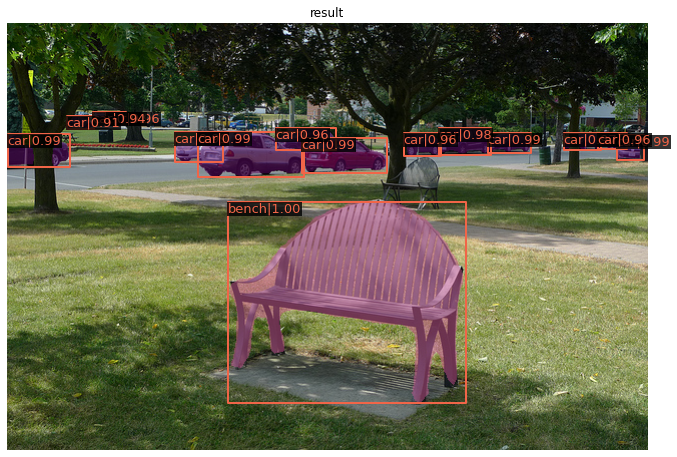

In [8]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import pathlib
# BASE_DIR will be like '/home/jovyan/DemoExample/'
BASE_DIR = pathlib.Path().absolute()
print(f"Working dir: {BASE_DIR}")

config_file = BASE_DIR / 'mmdetection/configs/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco.py'
# download the checkpoint from model zoo and put it in `checkpoints/`
# url: https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
checkpoint_file = BASE_DIR / 'mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth'
device = 'cuda:0'
# init a detector
model = init_detector(f"{config_file}", f"{checkpoint_file}", device=device)
# inference the demo image

demo_image = 'mmdetection/demo/demo.jpg'
result = inference_detector(model, 'mmdetection/demo/demo.jpg')

show_result_pyplot(model, demo_image, result, score_thr=0.9)

In [9]:
!python3 mmdet_test_rcnn.py

Working dir: /home/jovyan/mmdettest
/home/user/conda/lib/python3.7/site-packages/mmdet/core/anchor/builder.py:17: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '
Use load_from_local loader
/home/user/conda/lib/python3.7/site-packages/mmdet/datasets/utils.py:69: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)
/home/user/conda/lib/python3.7/site-packages/mmdet/core/anchor/anchor_generator.py:324: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/home/user/conda/lib/python3.7/site-packages/mmdet/core/anchor/anchor_generator.py:361: UserWarning: ``single_level_grid_anchors`` would be de

## Сборка образа с mmdetection

In [10]:
# Сборка образа с mmdetection
import client_lib
mmdetection_build_job = client_lib.ImageBuildJob(
    from_image='registry.aicloud.sbcp.ru/horovod-cuda10.1-tf2.3.0',
    requirements_file=f'{BASE_DIR}/requirements-mmdetection-cuda10.1.txt',
)

mmdetection_build_job.submit()

'ImageBuildJob "{\'image\': \'cr.msk.sbercloud.ru/a9fdc208-cebf-483f-9ff3-349442305252/job-custom-image-eb949f\', \'name\': \'image-build-job-jkbxn\', \'status\': \'ok\'}" created'

In [11]:
mmdetection_build_job.logs()

INFO[0000] Resolved base name registry.aicloud.sbcp.ru/horovod-cuda10.1-tf2.3.0 to registry.aicloud.sbcp.ru/horovod-cuda10.1-tf2.3.0 
INFO[0000] Resolved base name registry.aicloud.sbcp.ru/horovod-cuda10.1-tf2.3.0 to registry.aicloud.sbcp.ru/horovod-cuda10.1-tf2.3.0 
INFO[0000] Retrieving image manifest registry.aicloud.sbcp.ru/horovod-cuda10.1-tf2.3.0 
INFO[0000] Retrieving image manifest registry.aicloud.sbcp.ru/horovod-cuda10.1-tf2.3.0 
INFO[0000] Built cross stage deps: map[]                
INFO[0000] Retrieving image manifest registry.aicloud.sbcp.ru/horovod-cuda10.1-tf2.3.0 
INFO[0000] Retrieving image manifest registry.aicloud.sbcp.ru/horovod-cuda10.1-tf2.3.0 
INFO[0000] Unpacking rootfs as cmd RUN if [ -e /context/requirements.txt ]; then  pip install --user --no-cache -r /context/requirements.txt; fi requires it. 
INFO[0188] Taking snapshot of full filesystem...        
INFO[0206] RUN if [ -e /context/requirements.txt ]; then  pip install --user --no-cache -r /context/require

## Запуска задачи обучения (проверим, что работает инференс)

In [12]:
image_name = mmdetection_build_job.new_image
print(f"Дождитесь пока образ: {mmdetection_build_job.new_image} соберется")

Дождитесь пока образ: cr.msk.sbercloud.ru/a9fdc208-cebf-483f-9ff3-349442305252/job-custom-image-eb22a3 соберется


In [13]:
import client_lib
mmdet_run = client_lib.Job(base_image=image_name,
                              script=f'{BASE_DIR}/mmdet_test_rcnn.py',
                              n_workers=1, n_gpus=1)

In [14]:
mmdet_run.submit()

'Job "lm-mpi-job-8dae2655-5d57-46e4-ad99-bac360bb0c16" created'

In [15]:
mmdet_run.logs()

2021-08-17T14:17:12.090275636Z lm-mpi-job-8dae2655-5d57-46e4-ad99-bac360bb0c16-mpiworker-0.lm-mpi-job-8dae2655-5d57-46e4-ad99-bac360bb0c16
2021-08-17T14:17:12.090312551Z 1
2021-08-17T14:17:12.092953577Z worker name is lm-mpi-job-8dae2655-5d57-46e4-ad99-bac360bb0c16-mpiworker-0.lm-mpi-job-8dae2655-5d57-46e4-ad99-bac360bb0c16
2021-08-17T14:17:12.255806165Z /opt/kube/wait_workers.sh: line 22: lm-mpi-job-8dae2655-5d57-46e4-ad99-bac360bb0c16-mpiworker-0.lm-mpi-job-8dae2655-5d57-46e4-ad99-bac360bb0c16: Name or service not known
2021-08-17T14:17:12.255837345Z /opt/kube/wait_workers.sh: line 22: /dev/tcp/lm-mpi-job-8dae2655-5d57-46e4-ad99-bac360bb0c16-mpiworker-0.lm-mpi-job-8dae2655-5d57-46e4-ad99-bac360bb0c16/2222: Invalid argument
2021-08-17T14:17:13.259571548Z /opt/kube/wait_workers.sh: line 22: lm-mpi-job-8dae2655-5d57-46e4-ad99-bac360bb0c16-mpiworker-0.lm-mpi-job-8dae2655-5d57-46e4-ad99-bac360bb0c16: Name or service not known
2021-08-17T14:17:13.259599845Z /opt/kube/wait_workers.sh: line 

In [16]:
import client_lib
mmdet_test_imports = client_lib.Job(base_image=image_name,
                              script='python3 -c "from mmdet.apis import init_detector, inference_detector"', type="binary",
                              n_workers=1, n_gpus=1)
mmdet_test_imports.submit()

'Job "lm-mpi-job-af173308-94d3-4be7-b6fe-b5a6112f2140" created'

In [17]:
mmdet_test_imports.logs()

2021-08-17T14:26:31.017135076Z lm-mpi-job-af173308-94d3-4be7-b6fe-b5a6112f2140-mpiworker-0.lm-mpi-job-af173308-94d3-4be7-b6fe-b5a6112f2140
2021-08-17T14:26:31.017208126Z 1
2021-08-17T14:26:31.022171012Z worker name is lm-mpi-job-af173308-94d3-4be7-b6fe-b5a6112f2140-mpiworker-0.lm-mpi-job-af173308-94d3-4be7-b6fe-b5a6112f2140
2021-08-17T14:26:31.065712955Z /opt/kube/wait_workers.sh: line 22: lm-mpi-job-af173308-94d3-4be7-b6fe-b5a6112f2140-mpiworker-0.lm-mpi-job-af173308-94d3-4be7-b6fe-b5a6112f2140: Name or service not known
2021-08-17T14:26:31.065756982Z /opt/kube/wait_workers.sh: line 22: /dev/tcp/lm-mpi-job-af173308-94d3-4be7-b6fe-b5a6112f2140-mpiworker-0.lm-mpi-job-af173308-94d3-4be7-b6fe-b5a6112f2140/2222: Invalid argument
2021-08-17T14:26:32.069719713Z /opt/kube/wait_workers.sh: line 22: lm-mpi-job-af173308-94d3-4be7-b6fe-b5a6112f2140-mpiworker-0.lm-mpi-job-af173308-94d3-4be7-b6fe-b5a6112f2140: Name or service not known
2021-08-17T14:26:32.069748871Z /opt/kube/wait_workers.sh: line 